In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Logisticdata.csv')

In [3]:
#Class is targer variable, rest are features
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
df.describe

<bound method NDFrame.describe of       variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]>

In [6]:
df.shape

(1372, 5)

In [16]:
#Check for null values

df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

[1.15419999]


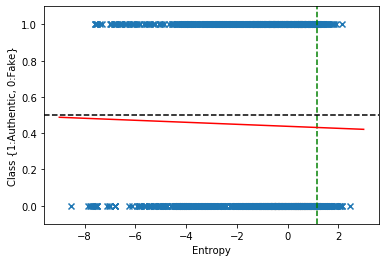

In [17]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

# instantiate model
linear_model = LinearRegression()

# fit the model
linear_model.fit(df[['entropy']], df[['class']])

# generate 1000 X-values 
X_sample = np.linspace(-9, 3, 1000)

# calculate y-values for 1000 X-values  ---------------- #USING coef_ and intercept_ to predict corresponding Y values
Y_sample = X_sample*linear_model.coef_[0] + linear_model.intercept_

# threshold for entropy
threshold  = (0.5 - linear_model.coef_[0]) / linear_model.intercept_
print(threshold)

# scatter plot 
plt.scatter(df[['entropy']], df[['class']], marker='x')

# axes specifications
plt.xlabel('Entropy')
plt.ylabel('Class {1:Authentic, 0:Fake}')
plt.ylim(-0.1, 1.1)

# threshold lines
plt.axvline(threshold, linestyle='--', color='green')
plt.axhline(0.5, linestyle='--', color='black')

# line plot
plt.plot(X_sample, Y_sample, color='red')

# display plot
plt.show()

[1.13309872]


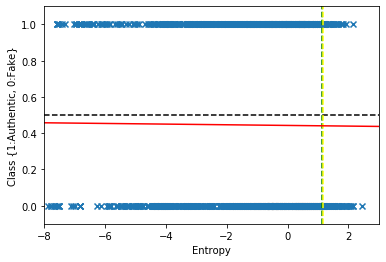

In [19]:
lm = LinearRegression()

# add outlier pointd to 'entropy' and 'class'
x = np.append(df.entropy.values, [35]).reshape(-1,1)
y = np.append(df['class'], [1]).reshape(-1,1)

# fit on new 'entropy' and 'class'
lm.fit(x, y)

# scatter plot 
plt.scatter(x, y, marker='x')

# axes modification
plt.xlabel('Entropy')
plt.ylabel('Class {1:Authentic, 0:Fake}')
plt.ylim(-0.1, 1.1)

# new threshold
new_threshold = (0.5 - lm.coef_[0]) / lm.intercept_
print(new_threshold)

# threshold lines
plt.axvline(new_threshold, linestyle='--', color='green')
plt.axhline(0.5, linestyle='--', color='black')
plt.axvline(threshold, linestyle='--', color='yellow')

# line plots
new_Y_sample = X_sample* lm.coef_[0]+lm.intercept_
plt.plot(X_sample, new_Y_sample, color='red')
plt.xlim(-8, 3)
plt.show()

In [20]:
#SIGMOID

def sigmoid(x):
    return 1/(1 + np.exp(-x)) 

result = sigmoid(0)
print(result)

0.5


In [23]:
#LOGISTIC REGRESSION - SIGMOID FUNCTION

from sklearn.linear_model import LogisticRegression

logreg1 = LogisticRegression()
logreg2 = LogisticRegression()

#Adding outlier points
x = np.append(df.entropy.values, [35]).reshape(-1,1)
y = np.append(df['class'],[1]).reshape(-1,1)

In [29]:
#Logistic Reg on entropy and class
logreg1.fit(df[['entropy']], df[['class']])

#Logistic Reg on appended outlier values
logreg2.fit(x,y)

C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

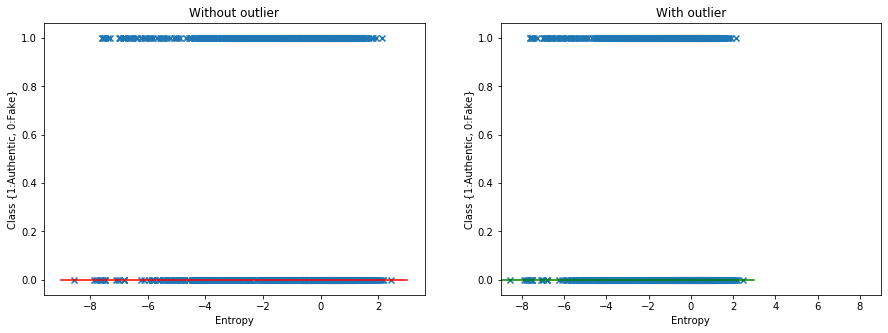

In [39]:
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(15,5))

ax_1.scatter(df[['entropy']], df[['class']], marker='x')
ax_1.set_title('Without outlier')
ax_1.set_xlabel('Entropy')
ax_1.set_ylabel('Class {1:Authentic, 0:Fake}')

ax_2.scatter(x,y, marker='x')
ax_2.set_title('With outlier')
ax_2.set_xlabel('Entropy')
ax_2.set_ylabel('Class {1:Authentic, 0:Fake}')

old_p = logreg1.predict(X_sample.reshape(-1,1))

new_p = logreg2.predict(X_sample.reshape(-1,1))

ax_1.plot(X_sample.reshape(-1,1), old_p, color = 'red')
ax_2.plot(X_sample.reshape(-1,1), new_p, color = 'green')
ax_2.set_xlim(-9, 9)

plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [42]:
#Scikit model building

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:4],df['class'], test_size=0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

regressor = LogisticRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Code starts here
cf = confusion_matrix(y_test, y_pred)
print(cf)

acc = accuracy_score(y_test, y_pred)
print(acc)

precision = precision_score(y_test,y_pred)
print(precision)

recall = recall_score(y_test,y_pred)
print(recall)

f_score = f1_score(y_test,y_pred)
print(f1_score)

[[144   4]
 [  7 120]]
0.96
0.967741935483871
0.9448818897637795
<function f1_score at 0x000002D240CB6B88>
